# Arboles de Decisión: Caso Titanic

El objetivo de este notebook es analizar cuales son las características determinantes para la supervivencia de la catástrofe del Titanic, para ello se usara una base de datos brindada por la Universidad de Stanford https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic_df = pd.read_csv('/work/titanic.csv')

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


## Exploración de Datos

In [ ]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
column_to_drop = ['Name' , 'Fare']

In [ ]:
titanic_df.drop(column_to_drop, axis ='columns', inplace=True)

In [ ]:
titanic_df.columns = ['Survived', 'Pclass', 'Sex', 'Age' , 'SiSp' , 'Parch']

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SiSp      887 non-null    int64  
 5   Parch     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB


In [ ]:
print(titanic_df.shape)

(887, 6)


In [ ]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SiSp          int64
Parch         int64
dtype: object

In [ ]:
titanic_df = pd.get_dummies(titanic_df, columns= ['Sex'], drop_first=True)

In [ ]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Age         float64
SiSp          int64
Parch         int64
Sex_male      uint8
dtype: object

In [ ]:
titanic_df.head()

,Survived,Pclass,Age,SiSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [ ]:
titanic_df.rename(columns = {'Sex_male' : 'Sex'}, inplace = True)

In [ ]:
titanic = titanic_df[['Survived', 'Pclass', 'Age', 'SiSp', 'Parch','Sex']]
titanic.head()

,Survived,Pclass,Age,SiSp,Parch,Sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


## Entrenamiento del árbol de Decisión con Scikit-Learn

In [ ]:
X = titanic.drop('Survived', axis = 1)
y = titanic.Survived

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size= 0.3, random_state= 00000)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2 , random_state= 00000)

In [ ]:
tree.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Evalución del Modelo

In [ ]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print( 'El acuracy en train es:' , train_accuracy)
print('El acuracy en test es:', test_accuracy) 


El acuracy en train es: 0.8048387096774193
El acuracy en test es: 0.7640449438202247


<function matplotlib.pyplot.show(close=None, block=None)>

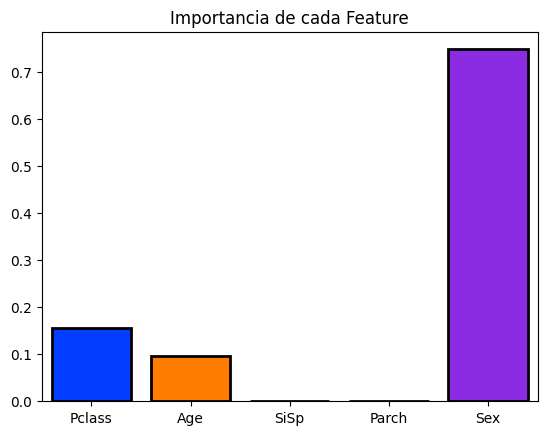

In [ ]:
importances =tree.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances, palette = 'bright', saturation = 2.0,edgecolor = 'black',linewidth = 2)
plt.title('Importancia de cada Feature')
plt.show

## Conclusiones

Para tener más probabilidades de sobrevivir en base a la variable Surived, las caracteristicas mas importantes son primero el Sexo, la clase social y la edad. También tenemos que resaltar la precisión que se expresa en la métrica de Accuracy, que es positivo para nuestro modelo.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d5330a3b-7fa6-485c-9184-ce3b73e79906' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>